<a href="https://colab.research.google.com/github/ai7dnn/2023-DA/blob/main/code/matplotlib_%ED%95%9C%EA%B8%80%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. 모듈 설치 koreanize-matplotlib
# 참조 사이트 https://github.com/ychoi-kr/koreanize-matplotlib
!pip install koreanize-matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.7 MB/s eta 0:00:00


In [2]:
# 2. 한글을 선명하게
%config InlineBackend.figure_format = 'retina'


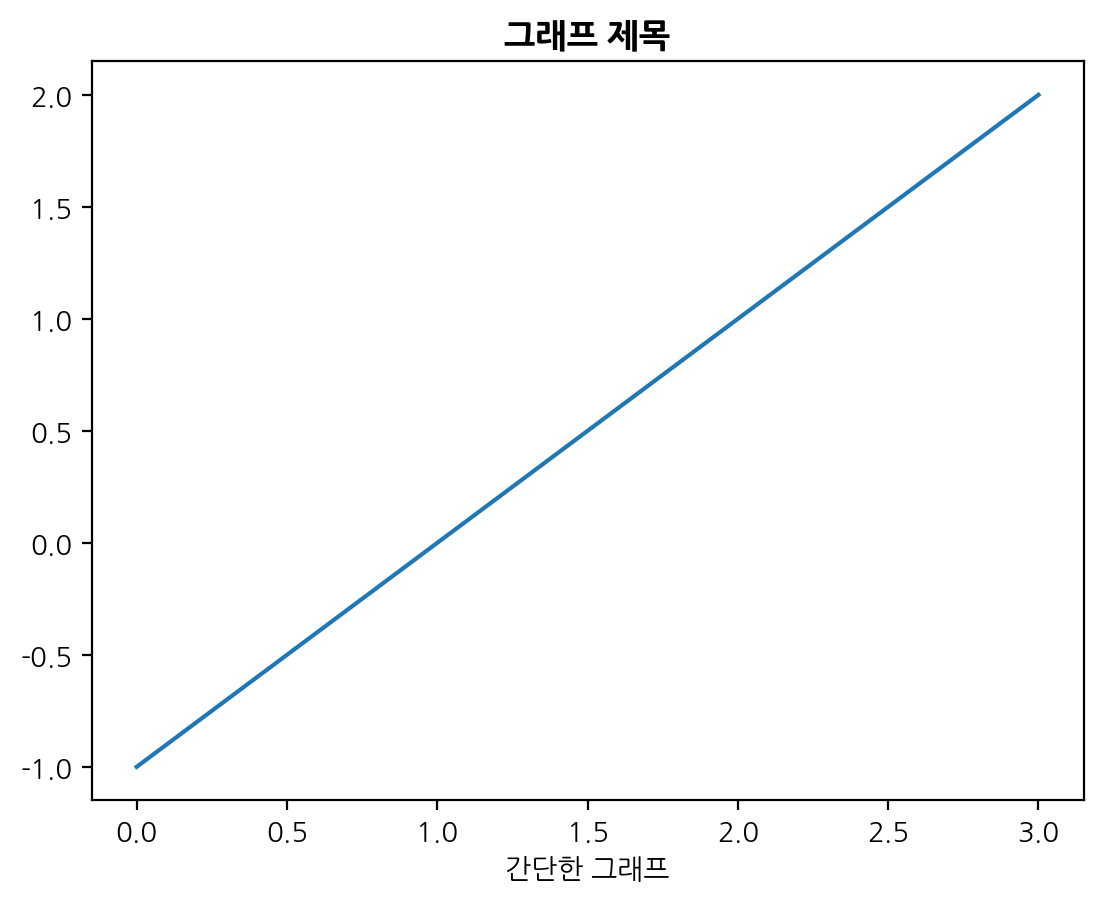

In [3]:
# 3. 바로 실행 테스트
import koreanize_matplotlib
import matplotlib.pyplot as plt

plt.plot([-1, 0, 1, 2])
plt.title('그래프 제목', fontweight="bold")
plt.xlabel('간단한 그래프')
plt.show()

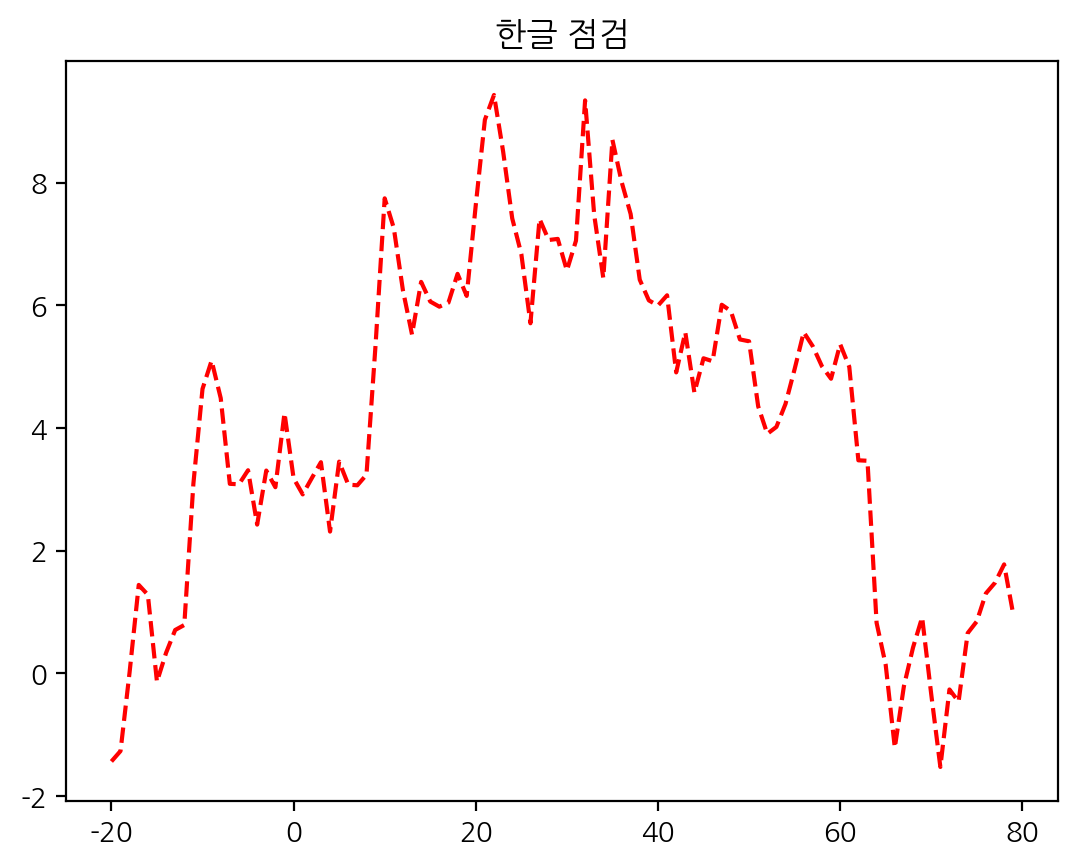

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(range(-20, 80), np.random.randn(100).cumsum(), 'r--')
plt.title('한글 점검');

<Figure size 1500x1200 with 0 Axes>

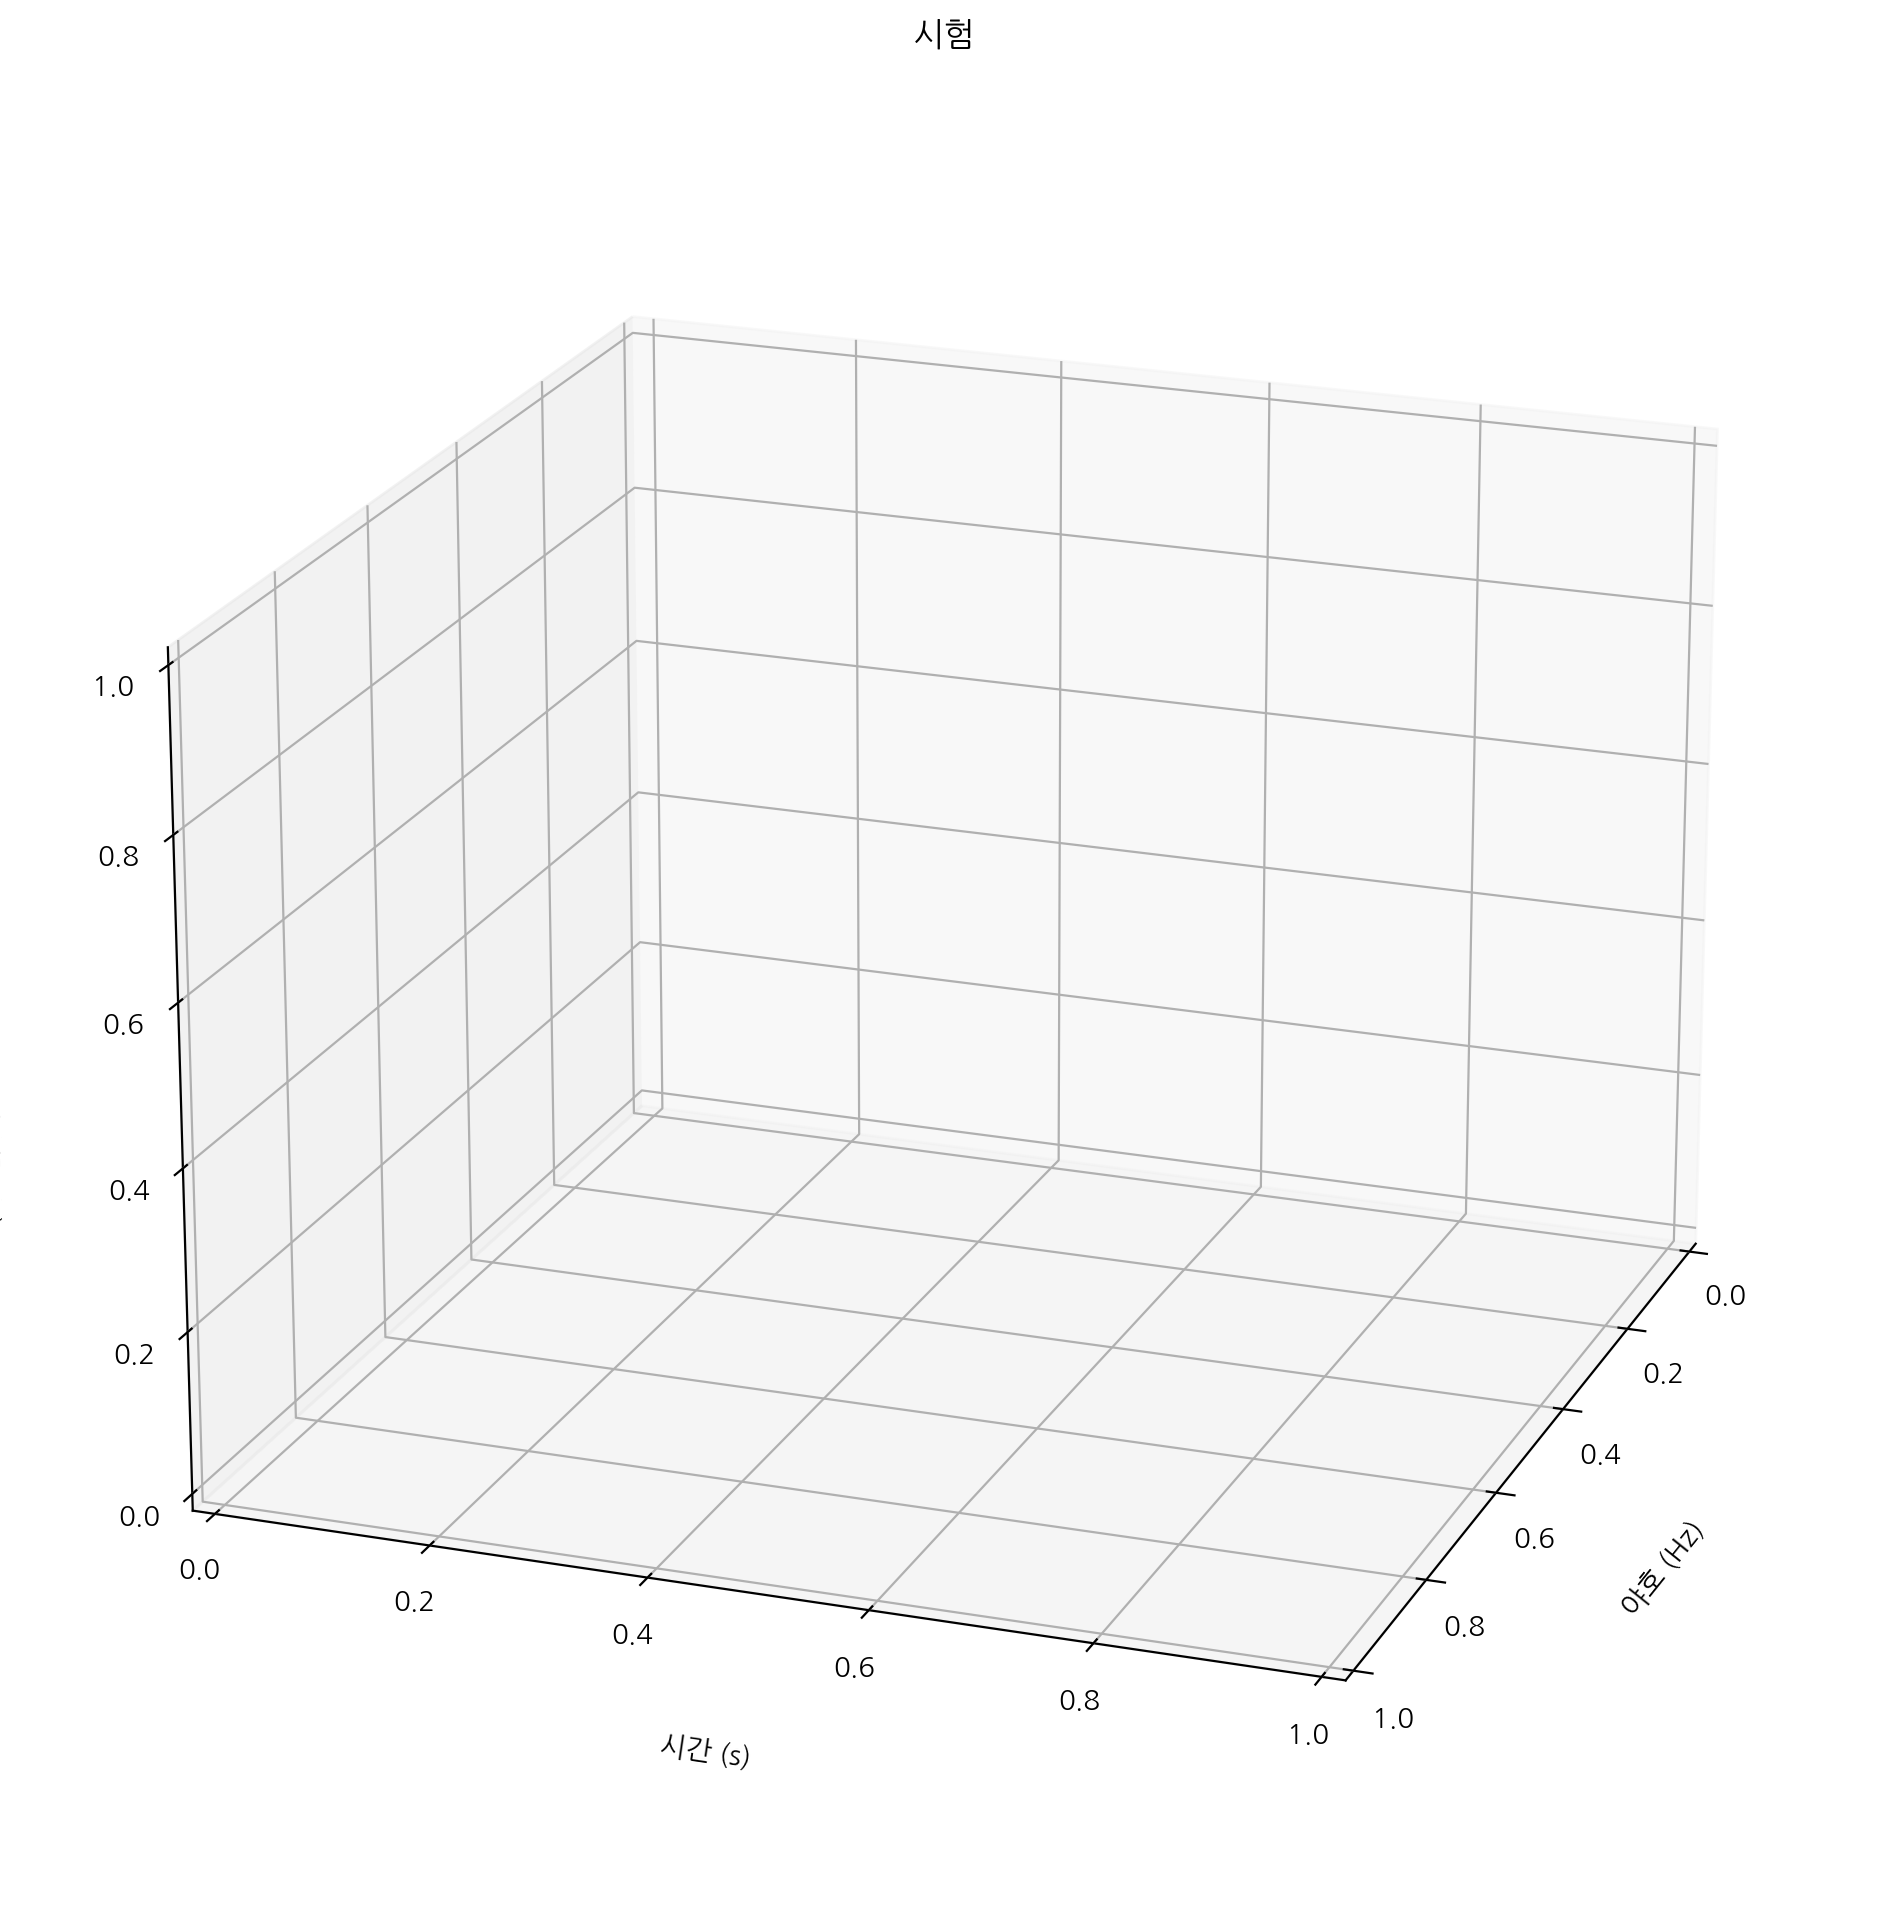

In [6]:
fig = plt.figure(figsize=(15, 12))
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(15, 12))

graph_title = '시험'
ax.set_title(f'{graph_title}')
ax.set_xlabel('야호 (Hz)', labelpad=20)
ax.set_ylabel('시간 (s)', labelpad=20)
ax.set_zlabel('이건 뭐지 (dB/Hz)', labelpad=20)

ax.view_init(20, 20)
plt.show()

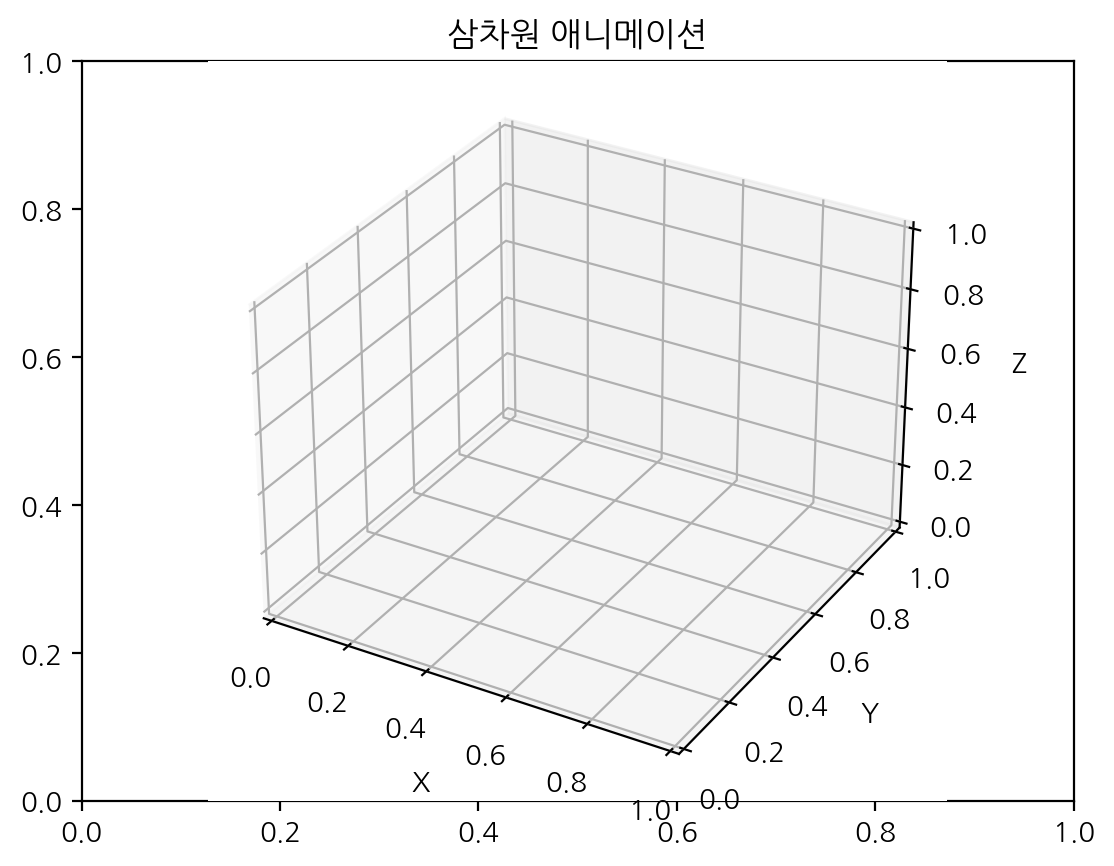

In [7]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.random.random(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk


def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(walk[:num, :2].T)
        line.set_3d_properties(walk[:num, 2])
    return lines


# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 30
walks = [random_walk(num_steps) for index in range(40)]

# Attaching 3D axis to the figure
fig = plt.figure()
plt.title('삼차원 애니메이션')
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
lines = [ax.plot([], [], [])[0] for _ in walks]

# Setting the axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walks, lines), interval=100)

plt.show()